<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inisialisasi" data-toc-modified-id="Inisialisasi-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inisialisasi</a></span></li><li><span><a href="#Muat-Data" data-toc-modified-id="Muat-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Muat Data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Buktikan-Bahwa-Pengaburan-Data-Bisa-Bekerja-dengan-LR" data-toc-modified-id="Buktikan-Bahwa-Pengaburan-Data-Bisa-Bekerja-dengan-LR-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Buktikan Bahwa Pengaburan Data Bisa Bekerja dengan LR</a></span></li><li><span><a href="#Uji-Regresi-Linear-dengan-Pengaburan-Data" data-toc-modified-id="Uji-Regresi-Linear-dengan-Pengaburan-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Uji Regresi Linear dengan Pengaburan Data</a></span></li><li><span><a href="#Apendiks-A:-Menulis-Rumus-di-Jupyter-Notebooks" data-toc-modified-id="Apendiks-A:-Menulis-Rumus-di-Jupyter-Notebooks-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Apendiks A: Menulis Rumus di Jupyter Notebooks</a></span></li><li><span><a href="#Apendiks-B:-Properti-Matriks" data-toc-modified-id="Apendiks-B:-Properti-Matriks-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Apendiks B: Properti Matriks</a></span></li></ul></div>

# Pernyataan

Perusahaan asuransi bernama "Sure Tomorrow" ingin menyelesaikan beberapa masalah dengan bantuan *machine learning*. Anda pun diminta untuk mengevaluasi kemungkinan tersebut.

- Tugas 1: Temukan klien yang mirip dengan kriteria klien tertentu. Tugas ini akan memudahkan perusahaan untuk melakukan pemasaran.
- Tugas 2: Prediksi apakah klien baru kemungkinan akan mengambil klaim asuransi. Apakah prediksi model lebih baik daripada prediksi model *dummy*?
- Tugas 3: Prediksi besaran klaim asuransi yang mungkin diterima klien baru menggunakan model regresi linear.
- Tugas 4: Lindungi data pribadi klien tanpa merusak model dari tugas sebelumnya. Sangatlah penting untuk mengembangkan algoritme transformasi data yang dapat mencegah penyalahgunaan informasi pribadi klien jika data tersebut jatuh ke tangan yang salah. Hal ini disebut penyembunyian data atau pengaburan data. Namun, prosedur perlindungan datanya pun perlu diperhatikan agar kualitas *model machine* learning tidak menurun. Di sini, Anda tidak perlu memilih model yang terbaik, cukup buktikan bahwa algoritme Anda bekerja secara akurat.

# Pra-pemrosesan & Eksplorasi Data

## Inisialisasi

In [1]:
pip install scikit-learn --upgrade

  Using cached scikit_learn-1.3.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'INSTALLER'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

import math

## Muat Data

Muat data dan lakukan pemeriksaan untuk memastikan data bebas dari permasalahan.

In [3]:
df = pd.read_csv('datasets/insurance_us.csv')

Mengganti nama kolom untuk membuat kode terlihat lebih konsisten dengan gayanya.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.head(10)

,gender,age,income,family_members,insurance_benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
df['age'] = df['age'].astype('int')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [10]:
df.duplicated().sum()

153

In [11]:
df = df.drop_duplicates().reset_index()
df.duplicated().sum()

0

In [12]:
df.isna().sum()

index                 0
gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

In [13]:
df.isnull().sum()

index                 0
gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

In [14]:
df.describe()

,index,gender,age,income,family_members,insurance_benefits
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,2481.185888,0.498453,31.023932,39895.811842,1.203425,0.152259
std,1448.282836,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,1222.500000,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,2466.000000,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,3734.500000,1.000000,37.000000,46600.000000,2.000000,0.000000
max,4999.000000,1.000000,65.000000,79000.000000,6.000000,5.000000


In [15]:
df.corr()

,index,gender,age,income,family_members,insurance_benefits
index,1.000000,-0.003765,0.001165,0.006648,-0.002425,0.004900
gender,-0.003765,1.000000,0.001953,0.015456,-0.007315,0.011565
age,0.001165,0.001953,1.000000,-0.017386,-0.009064,0.654964
income,0.006648,0.015456,-0.017386,1.000000,-0.031687,-0.013123
family_members,-0.002425,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
insurance_benefits,0.004900,0.011565,0.654964,-0.013123,-0.039303,1.000000


## EDA

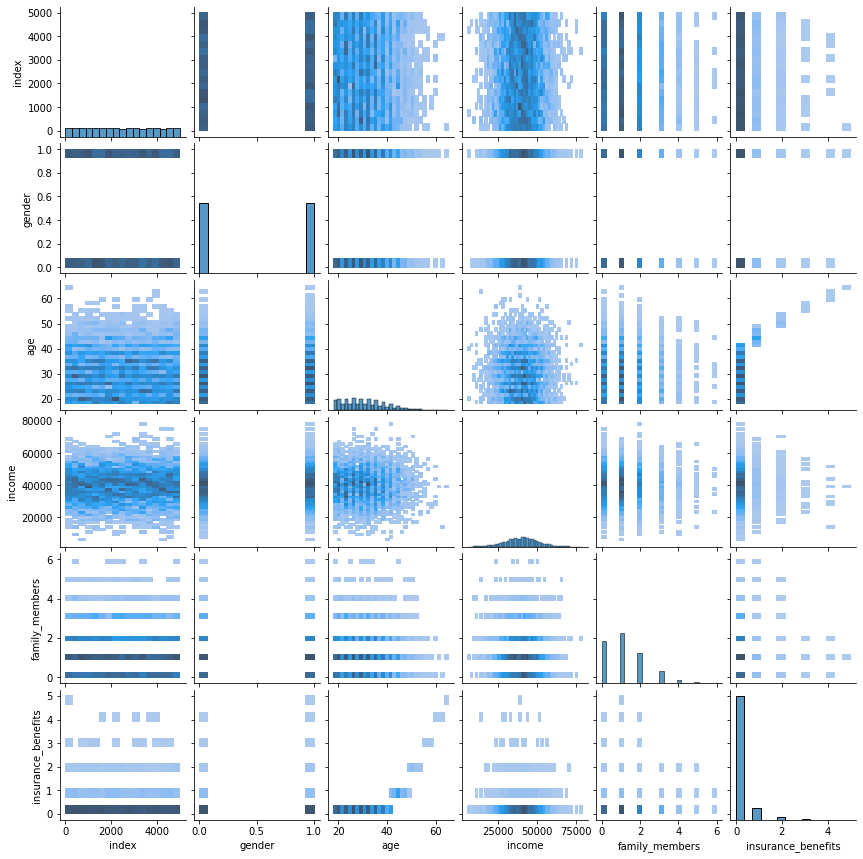

In [16]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

# Tugas 1. Klien yang Mirip

Dalam bahasa pemrograman ML, penting untuk mengembangkan prosedur yang bisa menentukan *k-nearest neighbors* (objek) pada objek tertentu berdasarkan jarak antar objek.

Untuk menyelesaikan tugas ini, kita bisa mencoba beberapa metrik jarak.

Uji algoritme tersebut untuk empat kombinasi dari dua kasus
- Penskalaan
  - data tidak diskalakan
  - data diskalakan dengan [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) 
- Metrik Jarak
  - Euklides
  - Manhattan

Jawablah pertanyaan-pertanyaan berikut:
- Apakah data yang tidak berskala memengaruhi algoritme kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?
- Seberapa mirip hasil yang Anda dapatkan dari metrik Euklides dengan saat Anda menggunakan metrik jarak Manhattan (abaikan ada atau tidaknya skala)?

In [17]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [18]:
def get_knn(df, n, k, metric):
    
    """
    Menampilkan k nearest neighbors

    :param df: DataFrame Pandas digunakan untuk menemukan objek-objek yang mirip di dalamnya
    :param n: nomor objek yang dicari k nearest neighbors
    :param k: jumlah k nearest neighbors yang ditampilkan
    :param metric: nama metrik jarak. 1 = Mahattan Distance, 2 = Euclidean Distance
    """

    nbrs = sklearn.neighbors.NearestNeighbors(p=metric).fit(df[feature_names]) # < ketik kode program Anda di sini > 
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Mengatur skala data.

In [19]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [20]:
df_scaled.sample(5)

,index,gender,age,income,family_members,insurance_benefits
3968,4087,0.0,0.292308,0.507595,0.500000,0
4175,4308,1.0,0.692308,0.618987,0.333333,1
1778,1804,1.0,0.507692,0.591139,0.333333,0
4022,4143,1.0,0.615385,0.432911,0.000000,0
2828,2893,0.0,0.384615,0.696203,0.666667,0


Sekarang, kita dapatkan catatan yang mirip untuk setiap kombinasi yang ada

In [21]:
knn_noscale_manhattan = get_knn(df, 0, 2, 1)
knn_noscale_manhattan

,index,gender,age,income,family_members,insurance_benefits,distance
0,0,1,41,49600.0,1,0,0.0
1992,2022,1,41,49600.0,0,0,1.0


In [22]:
knn_noscale_euclidean = get_knn(df, 0, 2, 2)
knn_noscale_euclidean

,index,gender,age,income,family_members,insurance_benefits,distance
0,0,1,41,49600.0,1,0,0.0
1992,2022,1,41,49600.0,0,0,1.0


In [23]:
knn_scale_manhattan = get_knn(df_scaled, 0, 2, 1)
knn_scale_manhattan

,index,gender,age,income,family_members,insurance_benefits,distance
0,0,1.0,0.630769,0.627848,0.166667,0,0.000000
2632,2689,1.0,0.630769,0.634177,0.166667,0,0.006329


In [24]:
knn_scale_euclidean = get_knn(df_scaled, 0, 2, 2)
knn_scale_euclidean

,index,gender,age,income,family_members,insurance_benefits,distance
0,0,1.0,0.630769,0.627848,0.166667,0,0.000000
2632,2689,1.0,0.630769,0.634177,0.166667,0,0.006329


Jawab pertanyaannya

**Apakah data yang tidak berskala memengaruhi algoritme kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?** 

Dari hasil pengujian, penskalaan data mempengaruhi algoritma KNN. Terlihat dari bedanya data dan jarak yang dikembalikan antara penggunaan skala (index 2689) dan jarak 1.0 sedangakan dengan tidak menggunakan skala (index 2022) dan jarak 0.006329. 

**Seberapa mirip hasil yang Anda dapatkan dari metrik Euklides dengan saat Anda menggunakan metrik jarak Manhattan (abaikan ada atau tidaknya skala)?** 

Tidak ada perbedaan antara algoritma KNN dengan menggunakan metrik Manhattan (1) dengan metrik Euclidean(2). Data yang dibalikan juga sama baik itu saat menggunakan penskalaan data ataupun tidak.

# Tugas 2. Apakah klien kemungkinan menerima klaim asuransi?

Dalam konteks *machine learning*, tugas ini sama seperti tugas klasifikasi biner.

Dengan target insurance_benefits yang lebih dari nol, coba evaluasi apakah model klasifikasi kNN merupakan pendekatan yang lebih baik daripada model *dummy*.

Instruksi:
- Buat pengklasifikasi berbasis KNN dan ukur kualitasnya dengan metrik F1 untuk k=1..10 bagi data asli dan data yang diskalakan. Akan menarik untuk melihat bagaimana k dapat memengaruhi metrik evaluasi, dan apakah penskalaan data membuat hasilnya berbeda. Gunakan implementasi algoritme klasifikasi kNN yang tersedia di Scikit-learn (periksa [tautan ini](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) atau gunakan milik Anda sendiri.
- Buat model *dummy* yang acak untuk kasus ini. Model tersebut harusnya menampilkan "1" dengan beberapa probabilitas. Mari kita uji model dengan empat nilai probabilitas: 0, probabilitas membayar benefit asuransi apa pun; 0,5; 1.

Probabilitas membayar klaim asuransi dapat didefinisikan sebagai

$$
P\{\text{klaim asuransi yang diterima}\}=\frac{\text{jumlah klien yang menerima klaim asuransi}}{\text{jumlah klien secara keseluruhan}}.
$$

Pisahkan keseluruhan data menjadi 70:30 untuk proporsi *training* dan *test set*.

In [25]:
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype('int')
df.sample(10)

,index,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
940,947,1,37,31200.0,2,0,0
580,583,0,21,57100.0,1,0,0
1126,1136,0,35,31500.0,1,0,0
4358,4495,0,35,42900.0,1,0,0
3881,3994,1,25,55500.0,1,0,0
729,733,1,25,52800.0,1,0,0
3546,3641,1,24,43200.0,1,0,0
2889,2954,0,46,41600.0,1,1,1
3209,3292,0,37,43200.0,2,0,0
2810,2874,0,32,58200.0,0,0,0


In [26]:
df['insurance_benefits_received'].value_counts(normalize=True)

0    0.883846
1    0.116154
Name: insurance_benefits_received, dtype: float64

In [27]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriks Kesalahan')
    print(cm)

In [28]:
def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [29]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'Probabilitasnya: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, df.shape[0])
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

Probabilitasnya: 0.00
F1: 0.00
Matriks Kesalahan
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

Probabilitasnya: 0.12
F1: 0.13
Matriks Kesalahan
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

Probabilitasnya: 0.50
F1: 0.19
Matriks Kesalahan
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

Probabilitasnya: 1.00
F1: 0.21
Matriks Kesalahan
[[0.         0.88384568]
 [0.         0.11615432]]



In [30]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(df.iloc[:,0:4], df.iloc[:,6], test_size=0.3, random_state=12345)
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_knn_train, y_knn_train)
knn_predict = knn.predict(X_knn_test)

eval_classifier(y_knn_test, knn_predict)

F1: 0.03
Matriks Kesalahan
[[0.87216495 0.01237113]
 [0.11340206 0.00206186]]


In [31]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(df_scaled, df.iloc[:,6], test_size=0.3, random_state=12345)
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_knn_train, y_knn_train)
knn_predict = knn.predict(X_knn_test)

eval_classifier(y_knn_test, knn_predict)

F1: 0.01
Matriks Kesalahan
[[8.70790378e-01 1.37457045e-02]
 [1.14776632e-01 6.87285223e-04]]


Dari hasil diatas, pendekatan KNN lebih baik dibanding pendekatan model dummy. Hal ini dibuktikan dengan hasil F1 pada pendekatan KNN yang lebih kecil dengan berada di angka 0.01, jauh lebih kecil dibanding pada model dummy pada angka 0.13. Selain itu, dari hasil confusion matrix pada pendekatan KNN, menunjukan bahwa sebesar 0.87 ada pada bagian True/Negatif, yang artinya banyak dari klien baru yang mungkin tidak mengklaim asuransi.

# Tugas 3. Regresi (dengan Regresi Linear)

Dengan `insurance_benefit` sebagai target, evaluasi berapa RMSE untuk model Regresi Linear.

Buat implementasi LR Anda sendiri. Untuk itu, coba ingat-ingat kembali bagaimana solusi tugas regresi linear dirumuskan dalam bentuk LA. Periksa RMSE untuk data asli maupun data yang telah diskalakan. Bisakah Anda melihat perbedaan RMSE di antara kedua kasus ini?

Tunjukkan
- $X$ — matriks fitur, satu baris merepresentasikan satu kasus, tiap kolom adalah fitur, kolom pertama terdiri dari satuan
- $y$ — target (vektor)
- $\hat{y}$ — estimasi target (vektor)
- $w$ — bobot vektor

Matriks untuk regresi linear dapat dirumuskan sebagai

$$
y = Xw
$$

Tujuan pelatihan untuk menemukan $w$ yang akan meminimalkan jarak L2 (MSE) antara $Xw$ dan $y$:

$$
\min_w d_2(Xw, y) \quad \text{atau} \quad \min_w \text{MSE}(Xw, y)
$$

Sepertinya ada solusi analitis untuk masalah di atas:

$$
w = (X^T X)^{-1} X^T y
$$

Rumus di atas bisa digunakan untuk menemukan bobot $w$ dan yang terakhir dapat digunakan untuk menghitung nilai prediksi

$$
\hat{y} = X_{val}w
$$

Pisahkan keseluruhan data menjadi *training set* dan *validation set* dengan proporsi 70:30. Gunakan metrik RMSE untuk evaluasi model.

In [32]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
        self.weights = weights[1:]
        self.weights0 = weights[0]

    def predict(self, X):
        
        X2 = X.dot(self.weights) 
        y_pred = X2 + self.weights0 
        
        
        return y_pred

In [33]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse}')
    
    r2_score = sklearn.metrics.r2_score(y_true, y_pred)
    print(f'R2: {r2_score}')    

In [34]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 3.58042291e-02  1.95594888e-02  5.85336165e-07 -1.21618420e-02]
RMSE: 0.36017511750256176
R2: 0.43287552621918124


In [35]:
X_scaled = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y_scaled = df_scaled['insurance_benefits'].to_numpy()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

[ 2.32727489  0.01955949  0.04624156 -0.07297105]


In [37]:
y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

RMSE: 0.3601751175025617
R2: 0.43287552621918135


RMSE antara data asli dengan data yang sudah diskalakan nilainya hampir sama. Jika kita lihat dengan 2 angka decimal, maka tidak terlihata perbedaannya. Tetapi bila dilihat nilai decimalnya secara keseluruha, akan terlihat perbedaannya meski tidak terlalu jauh.

# Tugas 4. Pengaburan Data

Cara terbaik untuk mengaburkan data adalah dengan mengalikan fitur-fitur numerik (ingat bahwa fitur-fitur tersebut bisa di lihat di matriks $X$) dengan matriks yang dapat dibalik (*invertible*) $P$. 

$$
X' = X \times P
$$

Coba lakukan itu dan periksa bagaimana nilai fitur akan terlihat setelah transformasi. Sifat *invertible* sangat penting pada kasus ini, jadi pastikan $P$ bahwa $P$ bersifat *invertible*.

Anda mungkin ingin meninjau kembali pelajaran 'Matriks dan Operasi Matriks -> Perkalian Matriks' untuk mengingat aturan perkalian matriks dan implementasinya dengan NumPy.

In [38]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [39]:
X = df_pn.to_numpy()
df_pn

,gender,age,income,family_members
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0
...,...,...,...,...
4842,0,28,35700.0,2
4843,0,34,52400.0,1
4844,0,20,33900.0,2
4845,1,22,32700.0,3


Membuat matriks acak $P$.

In [40]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Memeriksa apakah matriks $P$ *invertible*

In [41]:
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

Bisakah Anda menebak usia klien atau pendapatannya setelah dilakukan transformasi?

Setelah transformasi, nilai berubah dan tidak bisa untuk menebak nilai aslinya bila kita tidak mengetahui nilai dari P.

In [42]:
X1 = X @ P
X1

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Bisakah Anda memulihkan data asli dari $X'$ jika $P$ sudah diketahui? Coba periksa hal tersebut melalui perhitungan dengan memindahkan $P$ dari sisi kanan rumus di atas ke sisi kiri. Aturan perkalian matriks sangat berguna di sini.

In [43]:
X_new = X1 @ np.linalg.inv(P)

In [44]:
#pd.DataFrame([X1[0], X1[1]] @ np.linalg.inv(P))

Tampilkan ketiga kasus untuk beberapa klien
- Data asli
- Data yang sudah ditransformasikan
- Data yang telah dipulihkan ke semula

In [45]:
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

In [46]:
X1

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Mungkin Anda bisa melihat bahwa terdapat beberapa nilai yang tidak benar-benar sama dengan data sebelum ditransformasi. Kenapa bisa begitu?

In [47]:
X_new

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

In [48]:
pd.DataFrame(X_new, columns=feature_names).head(5)

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.473636e-12,46.0,38000.0,1.000000e+00
2,-2.515869e-12,29.0,21000.0,9.524523e-13
3,-4.844982e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-1.019907e-13


Data pada fitur gender dan family members tidak sama dengan data asli. Hal ini bisa disebabkan karena hasil dari perkalian matrix yang sangat specific dengan angka decimal dibelakang koma. Contohnya pada data di index ke 2, dimana hasil dari perhitungan antara $X'$ dengan P pada kolom gender menghasilkan nilai 0,00xx4473xx. 

##  Buktikan Bahwa Pengaburan Data Bisa Bekerja dengan LR

Tugas regresi pada proyek ini telah diselesaikan dengan regresi linear. Tugas selanjutnya adalah untuk membuktikan secara analitis bahwa metode pengaburan data tertentu tidak akan memengaruhi prediksi nilai regresi linear - nilai-nilai prediksi tersebut tidak akan berubah dari hasil awalnya. Apakah Anda yakin Anda bisa melakukannya?? Anda tidak harus yakin sekarang, tetapi Anda harus membuktikannya!

Jadi, data yang ada telah dikaburkan dan sekarang terdapat $X \times P$ alih-alih hanya $X$. Akibatnya, ada bobot lain $w_P$ sebagai
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Bagaimana menghubungkan $w$ dan $w_P$ jika Anda menyederhanakan rumus untuk wP di atas?

Nilai apa yang akan $w_P$ prediksi? 

Apa artinya bagi kualitas regresi linier jika Anda mengukurnya dengan RMSE?

Periksa lampiran B (Sifat-sifat Matriks) di bagian *notebook*. Tersedia beberapa rumus yang berguna di sana!

Tidak ada kode yang begitu penting di sesi ini, hanya penjelasan analitis!

**Jawaban**

Nilai $w_P$ adalah nilai dari regresi linear dengan data yang telah dikaburkan. Ini memprediksi atribut dependen pada data yang diberikan atau juga disebut sebagai target. Pada project ini, target yang diprediksi ada pada kolom insurance_benefits. Untuk memprediksi kolom tersebut, bisa menggunakan metode regresi, dan salah satunya adalah regresi linear dengan rumus $w$. Jadi, baik $w_P$ ataupun $w$ adalah sama, hanya berbeda dari data yang dilakukan pelatihan. Dan RMSE bertugas untuk menguji apakah kualitas dari regresi linear bagus atau tidak. Semakin RMSE mendekati nilai 0, semakin bagus kualitas regresi linearnya. Karena $w$ dan $w_P$ sama, maka kualitas dari RMSE seharusnya tidak jauh berbeda.

**Bukti analitis**

$$
w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

$$
w_P = [(X^T \times P^T) \times X \times P]^{-1} \times X^T \times P^T y
$$

$$
w_P = [X^TP^TXP]^{-1} X^TP^Ty
$$

$$
w_P = [X^{-1} (X^T)^{-1}P^{-1}(P^T)^{-1}P^TX^T]y
$$

$$
w_P = [X^{-1}(X^T)^{-1}P^{-1}X^T]y
$$

$$
w_P = [(X^TX)^{-1}X^T P^{-1}]y
$$

$$
w_P = w \times P^{-1}y
$$

## Uji Regresi Linear dengan Pengaburan Data

Sekarang, mari kita buktikan kalau Regresi Linear dapat bekerja secara komputasi dengan transformasi pengaburan yang dipilih.

Buat prosedur atau kelas yang menjalankan regresi linear dengan pengaburan data. Anda bisa menggunakan regresi linear yang tersedia di scikit-learn atau milik Anda sendiri.

Jalankan regresi linear terhadap data asli dan data yang disamarkan, bandingkan nilai prediksi dan RMSE, serta nilai metrik $R^2$. Apakah ada perbedaan?

**Prosedur**

- Buat matriks persegi $P$ dari angka acak.
- Periksa apakah matriks tersebut *invertible*. Jika tidak, ulangi dari langkah pertama sampai kita mendapatkan matriks yang bisa dibalik (*invertible*).
- <! ketik komentar Anda di sini !>
- Gunakan $XP$ sebagai matriks fitur baru 

In [49]:
lr2 = sklearn.linear_model.LinearRegression()
lr2.fit(X_train, y_train)
lr2_predict = lr2.predict(X_test)
eval_regressor(y_test, lr2_predict)

RMSE: 0.3601751175025618
R2: 0.432875526219181


In [50]:
lr3 = sklearn.linear_model.LinearRegression()
X_transform_train, X_transform_test, y_transform_train, y_transform_test = train_test_split(X1, y, test_size=0.3, random_state=12345)
lr3.fit(X_transform_train, y_transform_train)
lr3_predict = lr3.predict(X_transform_test)
eval_regressor(y_transform_test, lr3_predict)

RMSE: 0.36017511750254
R2: 0.43287552621924974


Sama seperti hasil sebelumnya pada tugas 2, bila dilihat dari 2 angka decimal tidak ada perbedaan hasil dari regresi linear terhadap data asli dengan data yang dimasking. Namun, bila dijabarkan lebih detail, terlihat perbedaan dari 2 data tersebut.

# Kesimpulan

Pada tugas pertama, terdapat perbedaan hasil antara pencarian dengan metode KNN untuk data asli dengan data skala. Tetapi untuk metric Euclidean dengan Manhattan menghasilkan data yang sama. Untuk melakukan pencarian klien yang mirip dengan kriteria tertentu, dapat menggunakan data dengan skala, karena terdapat penyetaraan pencarian yang efektif.

Pada tugas kedua, dengan hasil F1 yang kita dapatkan, prediksi model KNN lebih baik daripada prediksi model dummy. Pada prediksi model KNN menghasilkan F1 score terbaik sebesar 0.01 dengan data skala. Sedangkan pada prediksi model dummy, nilai F1 terkecil hanya sebesar 0.13. 
Bila dilihat dari table confusion matrix, pada bagian True/Negatif terdapat nilai sebesar 0,87 yang artinya sebagian besar klien baru kemungkinan tidak akan mengklaim asuransi. Namun, hasil ini perlu dikaji ulang dengan metode upsampling atau downsampling dikarenakan terdapat ketidakseimbangan data antara data positif dan negatif.

Terakhir, proses pengujian dengan pengkaburan data juga tidak terlalu mempengaruhi hasil dari kualitas model saat menggunakan data asli. Proses pengkaburan ini penting untuk menjaga data-data sensitif pelanggan dan perusahaan. Dari hasil pengujian, baik kualitas model dari data masking ataupun data asli yang diuji dengan RMSE dan R2 menunjukan hasil yang tidak jauh berbeda, dan bisa disebut hampir sama. 

# Apendiks 

## Apendiks A: Menulis Rumus di Jupyter Notebooks

Anda dapat menulis rumus di Jupyter Notebook dalam bahasa *markup* yang disediakan oleh sistem penerbitan berkualitas tinggi bernama $\LaTeX$ (diucapkan "Lah-tech"), dan rumus tersebut akan terlihat seperti rumus yang ada di buku teks.

Untuk memasukkan rumus ke dalam teks, letakkan tanda dolar (\\$) sebelum dan sesudah teks rumus. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Jika rumus harus ditulis dalam satu paragraf tersendiri, letakkan dua tanda dolar (\\$\\$) sebelum dan sesudah teks.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

Bahasa markup [LaTeX](https://en.wikipedia.org/wiki/LaTeX) sangat populer di kalangan orang-orang yang menggunakan rumus dalam artikel, buku, dan teks. Bahasa tesebut memang tampak rumit, tetapi dasarnya sebenarnya mudah. Periksa dua halaman [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) berikut untuk mempelajari cara membuat rumus yang paling umum.

## Apendiks B: Properti Matriks

Matriks memiliki banyak properti di Aljabar Linear. Beberapa di antaranya ada di daftar berikut yang dapat membantu pembuktian analitis dalam proyek ini.

<table>
<tr>
<td>Pendistribusian</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-komutativitas</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Properti asosiatif dari perkalian</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Properti identitas perkalian</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilitas dari transposisi hasil kali matriks,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>